# ARMA Models (Part 2) and ARIMA
### Arif Nurwahid
Seminar on 14 Mar 2023

___

In this moment, I will review about Order Determination.

The table below is the behaviour of the ACF dan PACF of a casual and invertible ARMA Models to identify the model.

| ![Behavior of the ACF and PACF of ARMA models](table3.1.jpg) | 
|:--:| 
| *Behavior of the ACF and PACF of ARMA models* |

In [1]:
## initializing requirement
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.time_series import illustration, demo

### Choosing the order of Autoregressive AR(p)

In [2]:
demo.AR1_simulation()

interactive(children=(FloatSlider(value=0.6, description='alpha1', max=2.0, min=-2.0), Output()), _dom_classes…

In [3]:
demo.AR2_simulation()

interactive(children=(FloatSlider(value=0.5, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=0.3, …

### Choosing the order of Moving Average MA(q)

In [4]:
demo.MA1_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), Output()), _dom_classes…

In [5]:
demo.MA2_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), FloatSlider(value=0.6, …

___

### Choosing the order of ARMA(p,q)

In [6]:
demo.AR2MA2_simulation()

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=-0.4,…

It is quite difficult to determine the order using the value of ACF and PACF for the combination like above, i.e. classical way by True ACF and PACF (theoritically). Therefore, there are another way by using information criteria such as AIC, BIC, HQIC, and so forth.

Another difficulty is that if the time series data is nonstationary. In this case, we can do differencing to get stationary time series.

---

## Nonstationary Time Series

Suppose $\{X_t\}$ satisfies ARMA(p,q) models as following:

$$
\begin{align*}
X_t &= \mu+\sum_{i=1}^{p} \varphi_{i}X_{t-i}+\epsilon_t+\sum_{j=1}^{q} \theta_{j}\epsilon_{t-j}\\
\varphi(B) X_t &= \mu + \theta (B) \epsilon_t
\end{align*}
$$

where:
- $\{\epsilon_t\}\sim WN(0,\sigma_{\epsilon}^2)$
- $E[X_s\epsilon_t]=0$ if $s<t$
- $\mu$ is a constant term
- $\varphi_p\ne 0$
- $\theta_q \ne 0$.
- $\varphi(z) = 1-\varphi_1 z - \varphi_2 z^2 - \cdots - \varphi_p z^p$
- $\theta (z) = 1+\theta_1 z+\theta_2 z^2 + \cdots + \theta_q z^q$

Here we can make a new model $\{Y_t\}$ that satisfies $Y_t=\nabla^d X_t = (1-B)^d X_t$. 

If $\{Y_t\}$ is stationary, then we can build an ARMA(p,q) model for it as follows:

$\varphi(B) Y_t = \mu + \theta (B) \epsilon_t$ or $\varphi(B) (1-B)^d X_t = \mu + \theta (B) \epsilon_t$

### Definition
1. Equation $\varphi(B) (1-B)^d X_t = \mu + \theta (B) \epsilon_t$ with $Y_t=(1-B)^d X_t$ is stationary is called an ARIMA(p,d,q) model.
2. A time series $\{X_t\}$ that satisfies $\varphi(B) (1-B)^d X_t = \mu + \theta (B) \epsilon_t$ is said to be ARIMA(p,d,q) process.

#### Example 1

Below is the example of nonstationary time series.

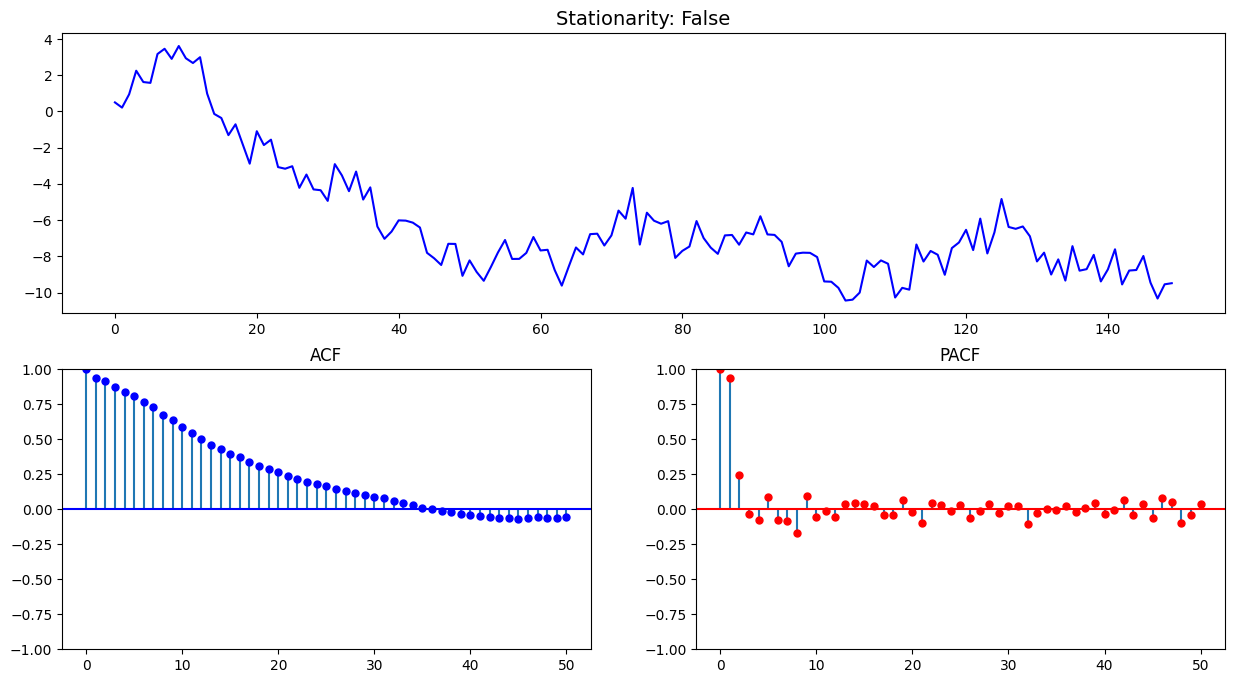

In [7]:
demo.nonstationarity_simulation()

As for the PACF, maybe we can see that it cuts of after lag 1 or 2 for guessing AR(1) or AR(2), but the ACF shows its value that almost all significant and decreasing slowly. In addition, the data plot shows the trend which is the sign of nonstationarity.

Here we will try to do differencing one time.

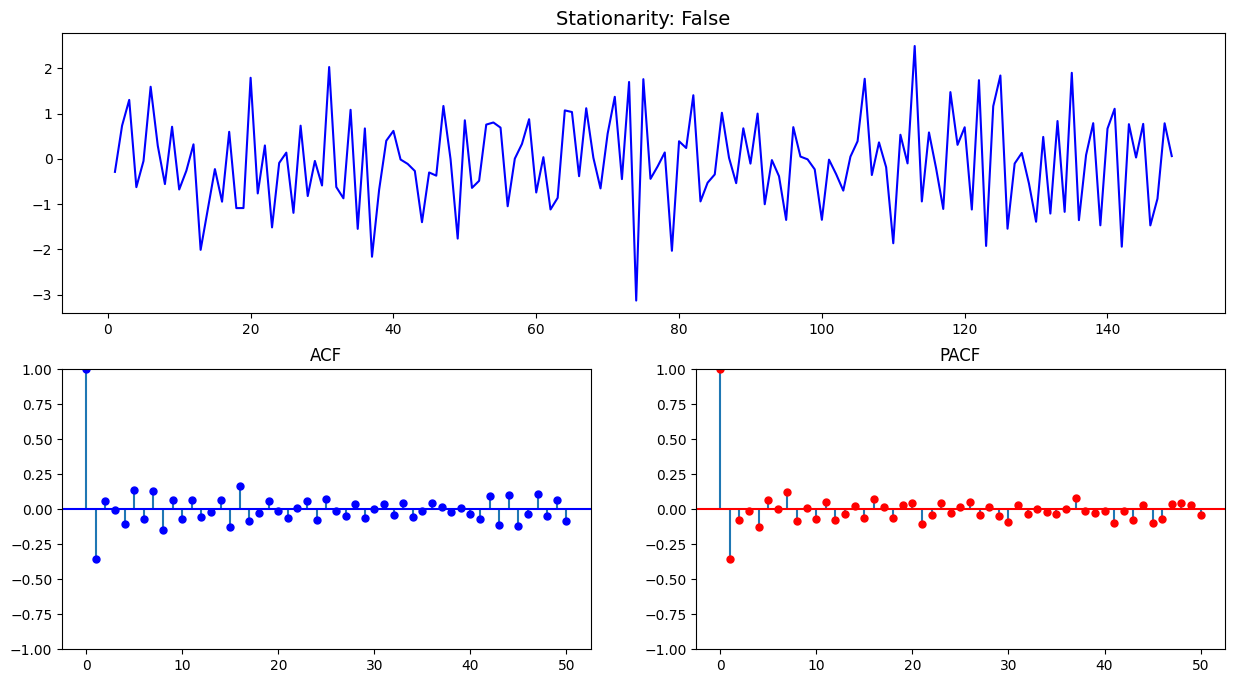

In [8]:
demo.nonstationarity_simulation(diff=True)

In this result, we can say that the model is ARIMA(1,1,1).

___

### Overview of AIC, BIC, HQIC

#### Akaike Information Criterion (AIC)
```AIC = −2(maximized log likelihood) + 2(No. of estimated parameters)```

#### Bayesian Information Criterion (BIC)
```BIC = −2(maximized log likelihood)+log(n)(No. of estimated parameters)```

#### Hannan-Quinn Information Criterion (HQIC)
```HQIC = −2(maximized log likelihood) + log log(n)(No. of estimated parameters)```

Above are information criterions of model that we can use to choose the model by minimizing those values. However they are not good to select the order of differencing (d) of an ARIMA (p,d,q). Then it is recommended to do differencing in advance. 

#### Example 2

In [8]:
from pmdarima import auto_arima

<Axes: xlabel='Date'>

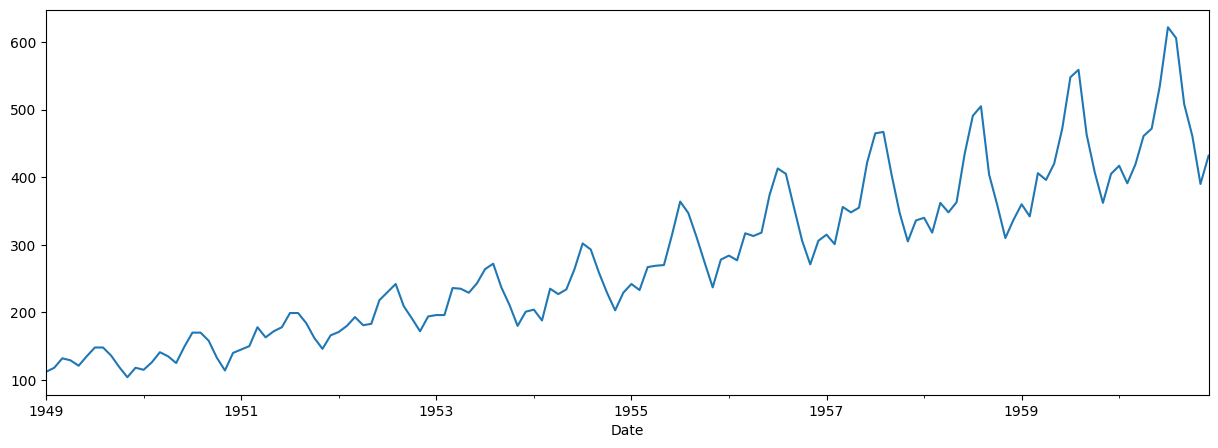

In [9]:
df = pd.read_csv("data/airline.csv", index_col="Date", parse_dates=["Date"])
ts = df.passengers
X_train, X_test = ts[:-25],ts[-25:]
ts.plot(figsize=(15,5))

In [13]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion="aic", trace=True, suppress_warnings=True, random=42)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=805.863, Time=3.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=899.922, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=803.454, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=852.518, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1051.673, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=802.257, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=803.527, Time=0.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=805.382, Time=0.79 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=801.679, Time=0.04 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=803.256, Time=0.36 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=803.333, Time=0.58 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=801.818, Time=0.14 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=802.047, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

In [14]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Tue, 14 Mar 2023   AIC                            801.679
Time:                                    16:48:51   BIC                            812.370
Sample:                                01-01-1949   HQIC                           806.013
                                     - 11-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.92   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
nf = len(X_test)+20 # predict additional 20 data in future from the test data
pred = arima.predict(nf)

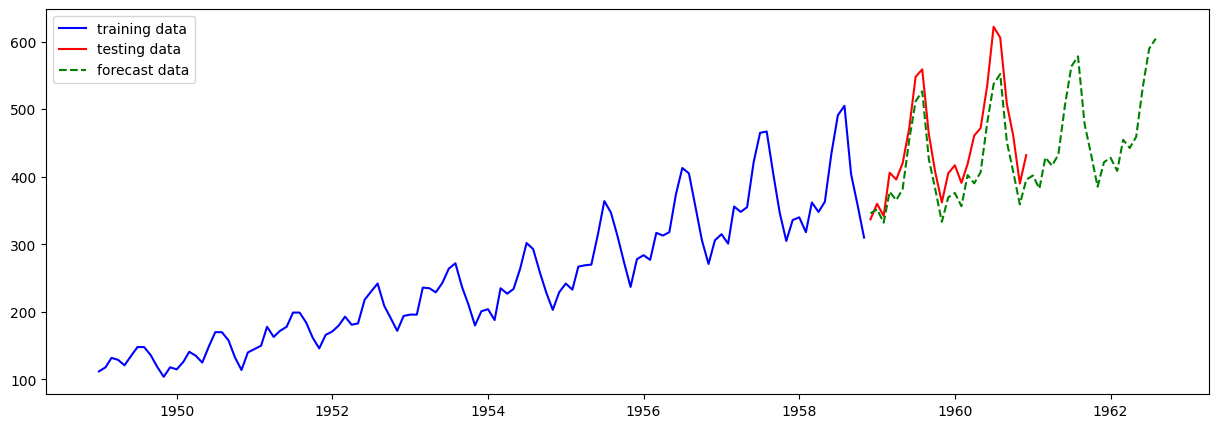

In [16]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="training data")
plt.plot(X_test, "r-", label="testing data")
plt.plot(pred, "g--", label="forecast data")
plt.legend()

---

#### Example 3

In [17]:
nao = pd.read_csv("data/nao.csv", header=0)

In [18]:
nao.head()

,year,month,index
0,1950,1,0.92
1,1950,2,0.40
2,1950,3,-0.36
3,1950,4,0.73
4,1950,5,-0.59


In [19]:
tidx = pd.date_range('1950-01',periods=len(nao),freq="M")
nao.index=tidx
nao_ts = nao['index']

In [20]:
nao.head()

,year,month,index
1950-01-31,1950,1,0.92
1950-02-28,1950,2,0.40
1950-03-31,1950,3,-0.36
1950-04-30,1950,4,0.73
1950-05-31,1950,5,-0.59


<Axes: >

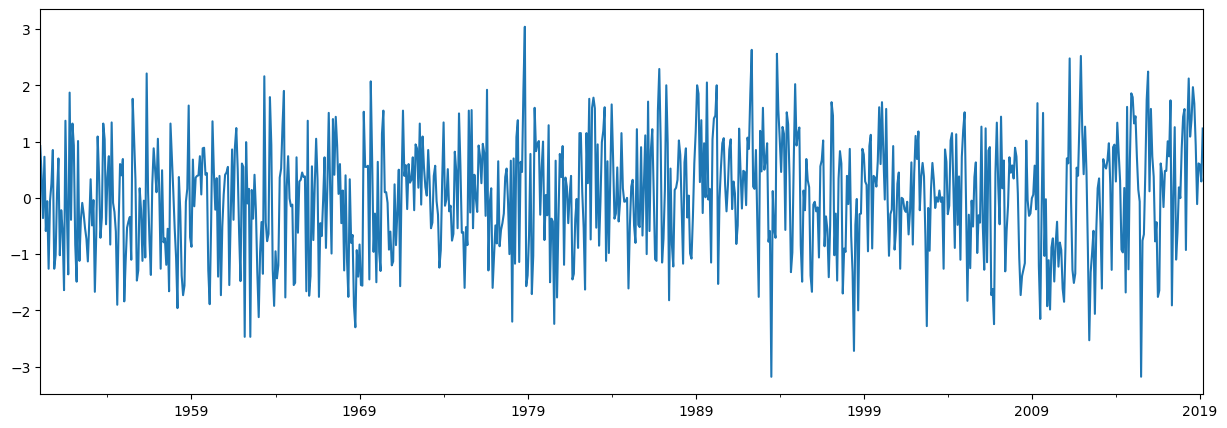

In [21]:
X_train, X_test = nao_ts[:-25],nao_ts[-25:]
nao_ts.plot(figsize=(15,5))

In [22]:
arima = auto_arima(X_train, information_criterion="aic", trace=True, suppress_warnings=True, random=42)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2282.724, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2308.217, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2280.177, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2282.394, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2306.441, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2281.772, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2281.836, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2283.749, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2278.319, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2279.905, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2279.970, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2280.553, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2281.883, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.578 seconds


In [23]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  806
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1137.159
Date:                Tue, 14 Mar 2023   AIC                           2278.319
Time:                        16:52:25   BIC                           2287.703
Sample:                    01-31-1950   HQIC                          2281.923
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1916      0.034      5.678      0.000       0.125       0.258
sigma2         0.9837      0.053     18.398      0.000       0.879       1.089
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.65
Prob(Q):                              0.90   Prob(JB):                         0.10
Heteroskedasticity (H):               0.97   Skew:                            -0.09
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

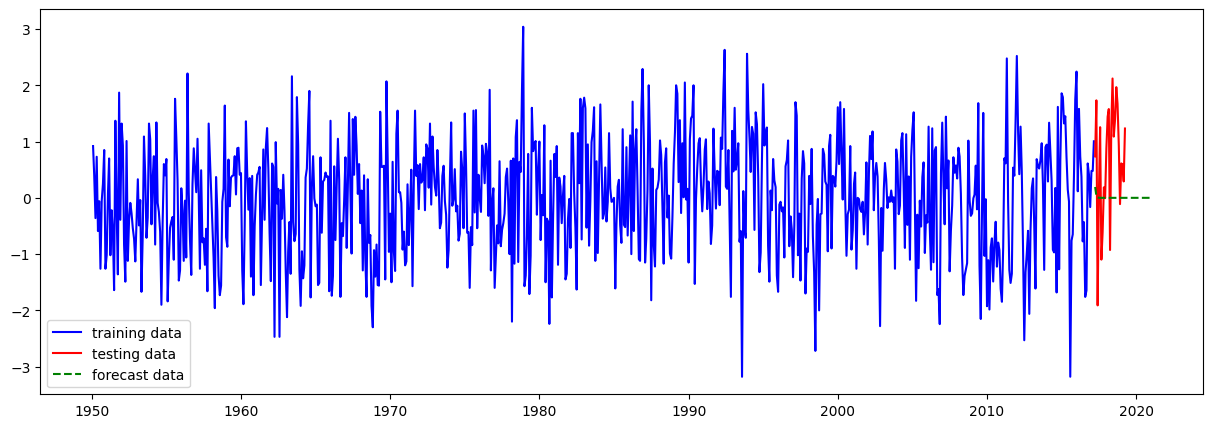

In [24]:
nf = len(X_test)+20 # predict additional 20 data in future from the test data
pred = arima.predict(nf)

plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="training data")
plt.plot(X_test, "r-", label="testing data")
plt.plot(pred, "g--", label="forecast data")
plt.legend()

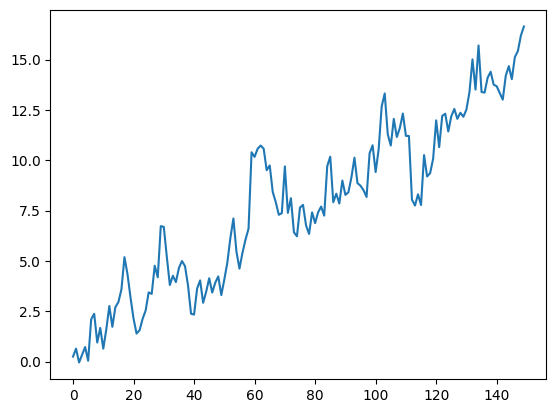

In [28]:
plt.plot(demo.trending_data)